## Estudio de tiempos

### Importación de bibliotecas

In [79]:
# Importación de bibliotecas
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

### Carga de los datos
Se recogen los datos del fichero CSV generado con el Notebook "Extracción.ipynb".

In [80]:
df = pd.read_csv('../TFG/Outputs/Datos/datos.csv', sep=';', index_col=False)
df

,Max1.,Max2.,Max3.,Max4.,Max5.,Max6.,Max7.,Max8.,Max9.,Max10.,...,Diff7. norm.,Diff8. norm.,Diff9. norm.,Diff10. norm.,Mean time,Mean speed,Hand R(0)/L(1),Sex M(0)/W(1),Age,Parkinson
0,0.301561,0.301406,0.312076,0.301394,0.298748,0.344640,0.359823,0.335628,0.329234,0.332863,...,0.983009,0.914471,0.895536,0.911191,8.9,0.118006,0,1,71,0
1,0.362078,0.335549,0.283722,0.280966,0.291212,0.228908,0.229185,0.240358,0.238083,0.255766,...,0.585931,0.623436,0.571823,0.654275,12.5,0.059034,1,1,71,0
2,0.303023,0.283602,0.265378,0.290236,0.306413,0.275577,0.294769,0.299509,0.283839,0.282492,...,0.946385,0.960987,0.896750,0.898101,7.2,0.134156,0,1,73,0
3,0.332442,0.342932,0.341242,0.359438,0.360582,0.348706,0.329406,0.342690,0.341477,0.334383,...,0.853731,0.891237,0.881354,0.869447,9.7,0.105336,1,1,73,0
4,0.384571,0.361206,0.404770,0.366703,0.332424,0.380036,0.341502,0.361529,0.384088,0.367105,...,0.816661,0.877577,0.919868,0.882106,9.5,0.101239,0,0,71,0
5,0.535559,0.436309,0.465971,0.416307,0.431282,0.284341,0.292600,0.308507,0.326901,0.316095,...,0.526085,0.556693,0.601495,0.582173,10.8,0.065247,1,0,71,0
6,0.390448,0.389467,0.381692,0.378891,0.359713,0.241666,0.255357,0.268497,0.274892,0.310772,...,0.611093,0.294448,0.696183,0.734361,13.7,0.052873,0,1,70,1
7,0.270891,0.332399,0.350438,0.325218,0.292455,0.267236,0.328753,0.337443,0.295763,0.339445,...,0.899928,0.892233,0.814364,0.913402,10.4,0.095166,1,1,70,1
8,0.460935,0.482424,0.478082,0.472404,0.455066,0.386553,0.412259,0.407419,0.411988,0.396710,...,0.849126,0.822470,0.843032,0.803962,12.1,0.074920,1,0,82,1
9,0.352725,0.355189,0.314825,0.346666,0.380882,0.355881,0.308192,0.322067,0.332098,0.329428,...,0.780538,0.824949,0.829037,0.826377,8.0,0.113941,0,0,82,1


### Inicialización de variables
Se inicializan las variables necesarias para realizar el estudio de tiempos.

In [81]:
# Se eliminan las columnas que no mejoren los resultados de los modelos (los datos no normalizados, 
# Mean time y Age) y la clase (Parkinson) del conjunto de datos.
X = df.drop(columns=['Max1.', 'Max2.', 'Max3.', 'Max4.', 'Max5.', 'Max6.', 'Max7.', 'Max8.', 'Max9.', 'Max10.', 
            'Min1.', 'Min2.', 'Min3.', 'Min4.', 'Min5.', 'Min6.', 'Min7.', 'Min8.', 'Min9.', 'Min10.', 
            'Diff1.', 'Diff2.', 'Diff3.', 'Diff4.', 'Diff5.', 'Diff6.', 'Diff7.', 'Diff8.', 'Diff9.', 
            'Diff10.', 'Mean time', 'Age', 'Parkinson'])

# Se inicializa la matriz que contendrá la clase.
y = df['Parkinson']

# Inicialización del estado aleatorio que tendrán los modelos.
random_state = 55

# Modelos que se utilizarán para clasificar.
modelos = []
modelos.append(RandomForestClassifier(random_state=random_state))
modelos.append(KNeighborsClassifier())
modelos.append(DecisionTreeClassifier(random_state=random_state))
modelos.append(GaussianNB())
modelos.append(SVC(random_state=random_state))
modelos.append(MultinomialNB())
modelos.append(DummyClassifier(random_state=random_state))

# Nombres de los modelos.
nombres=['Random Forest', 'k-Nearest Neighbors', 'Árbol de decisión', 'Naive Bayes Gaussiano', 'SVM', 'Naive Bayes', 'Dummy']

# Obtención de los conjuntos de entrenamiento y test con los datos sin la clase
# y con los datos de la clase.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

### Estudio de tiempos
Dado que hay modelos que tardan más en predecir que en entrenar o viceversa, se realiza el estudio de tiempos en dos partes:
- El tiempo que tarda un modelo en entrenar (método *fit*).
- El tiempo que tarda un modelo en predecir (método *predict*).

In [90]:
tiempos=[]
tiempos_p=[]
for m in modelos:
    aux=[]
    aux_p=[]
    for i in range(10):
        inicio_fit = time.time()
        m.fit(X_train, y_train)
        fin_fit = time.time()
        m.predict(X_test)
        fin = time.time()
        aux.append(round(fin_fit - inicio_fit, 5))
        aux_p.append(round(fin - fin_fit, 5))
    aux.append(round(sum(aux), 5))
    aux_p.append(round(sum(aux_p), 5))
    tiempos.append(aux)
    tiempos_p.append(aux_p)

#### Visualización de los resultados del entrenamiento
Se visualiza en formato tabla y gráfico de barras lo que se ha tardado en entrenar.

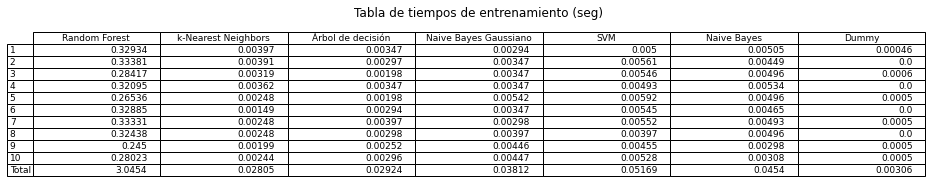

In [91]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 3)
filas = [x for x in range(1, 11)]
filas.append("Total")
ax.axis('off')
ax.table(cellText=np.transpose(tiempos), colLabels=nombres, rowLabels=filas, loc="center")
plt.title("Tabla de tiempos de entrenamiento (seg)")
plt.show()

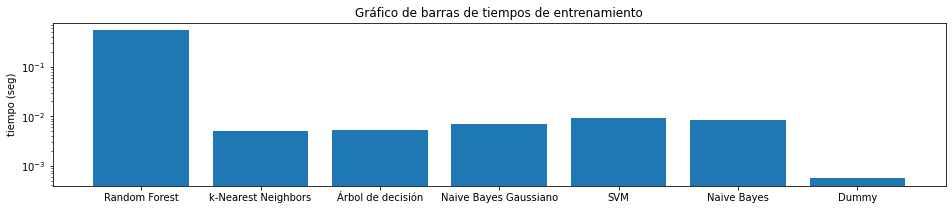

In [92]:
media_tiempos=[]
for t in range(len(tiempos)):
    media_tiempos.append(np.mean(tiempos[t]))
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 3)
plt.bar(nombres, media_tiempos, log = True)
plt.title("Gráfico de barras de tiempos de entrenamiento")
plt.ylabel("tiempo (seg)")
pass

#### Visualización de los resultados de la predicción
Se visualiza en formato tabla y gráfico de barras lo que se ha tardado en predecir.

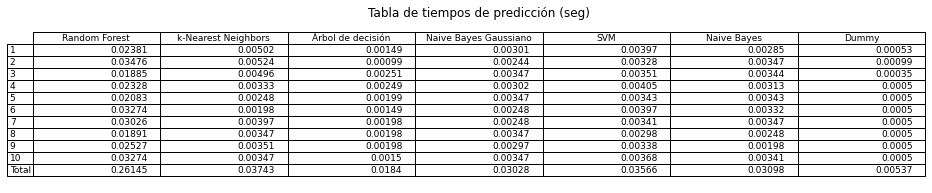

In [93]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 3)
filas = [x for x in range(1, 11)]
filas.append("Total")
ax.axis('off')
ax.table(cellText=np.transpose(tiempos_p), colLabels=nombres, rowLabels=filas, loc="center")
plt.title("Tabla de tiempos de predicción (seg)")
plt.show()

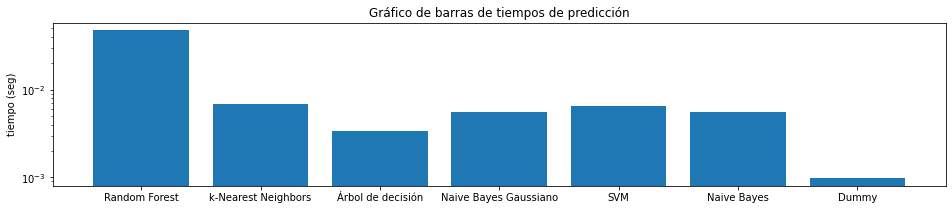

In [94]:
media_tiempos_p=[]
for t in range(len(tiempos_p)):
    media_tiempos_p.append(np.mean(tiempos_p[t]))
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 3)
plt.bar(nombres, media_tiempos_p, log = True)
plt.title("Gráfico de barras de tiempos de predicción")
plt.ylabel("tiempo (seg)")
pass